In [1]:
#import modules
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from matplotlib.colors import ListedColormap


import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#Load datasets
digits=datasets.load_digits()

In [3]:
X = digits.data
y = digits.target
train_data=[]
test_data=[]

X_train, X_test, y_train, y_test = train_test_split(X , y , test_size = 0.2)

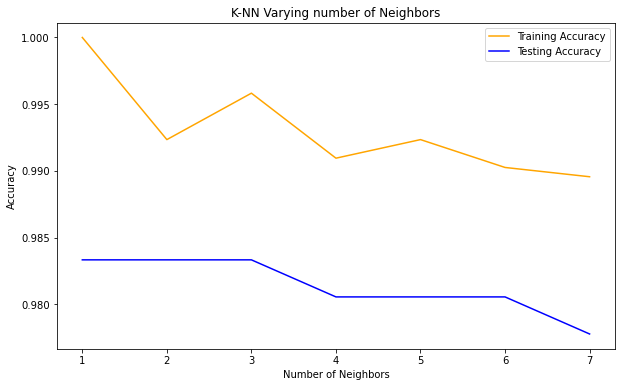

In [4]:
#Optimal K
for i in range(1,8):
	KNN=KNeighborsClassifier(n_neighbors=i)
	KNN.fit(X_train, y_train)
	train_data.append(KNN.score(X_train,y_train))
	test_data.append(KNN.score(X_test,y_test))
accKNN=KNN.score(X_train,y_train)    
plt.figure(figsize=(10,6))
plt.plot(range(1,8),train_data,color='orange', linestyle='solid', label="Training Accuracy")
plt.plot(range(1,8),test_data,color='blue', linestyle='solid', label="Testing Accuracy")
plt.title('K-NN Varying number of Neighbors')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


Text(0, 0.5, 'Error Rate')

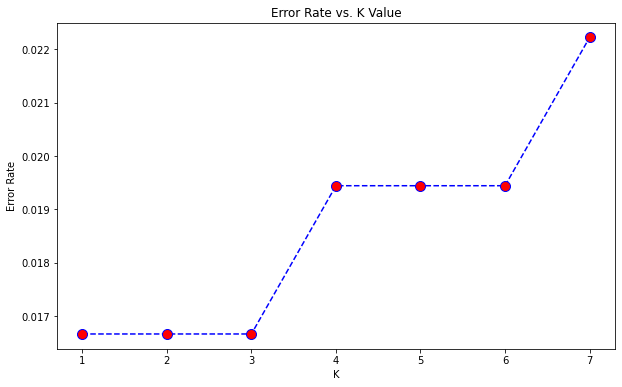

In [13]:
#Optimal K
error_rate = []
for i in range(1,8):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,8),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [ ]:
#From the calculated accuracy and error rate, we can infer that the K at 1 is optimal as it has high accuracy leading to less error rate.

In [15]:
svm= SVC(kernel='linear')
svm.fit(X_train,y_train)
y_pred = svm.predict(X_test)
print(classification_report(y_test, y_pred))
accSVM=svm.score(X_train,y_train)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       0.95      1.00      0.97        35
           2       1.00      1.00      1.00        38
           3       0.97      0.97      0.97        30
           4       1.00      1.00      1.00        32
           5       0.97      1.00      0.99        39
           6       1.00      0.98      0.99        41
           7       0.95      0.97      0.96        36
           8       0.97      0.97      0.97        34
           9       0.97      0.90      0.94        40

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



In [6]:
svm= SVC(kernel='poly')
svm.fit(X_train,y_train)
y_pred = svm.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        35
           1       0.97      1.00      0.99        35
           2       1.00      1.00      1.00        38
           3       1.00      1.00      1.00        30
           4       1.00      1.00      1.00        32
           5       1.00      1.00      1.00        39
           6       1.00      0.98      0.99        41
           7       0.97      0.97      0.97        36
           8       1.00      0.97      0.99        34
           9       0.97      0.97      0.97        40

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



In [7]:
svm= SVC(kernel='rbf')
svm.fit(X_train,y_train)
y_pred = svm.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       0.95      1.00      0.97        35
           2       1.00      1.00      1.00        38
           3       1.00      0.97      0.98        30
           4       1.00      1.00      1.00        32
           5       1.00      1.00      1.00        39
           6       1.00      0.98      0.99        41
           7       0.95      0.97      0.96        36
           8       1.00      0.97      0.99        34
           9       0.97      0.97      0.97        40

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



In [8]:
svm= SVC(kernel='sigmoid')
svm.fit(X_train,y_train)
y_pred = svm.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        35
           1       0.79      0.89      0.84        35
           2       1.00      0.95      0.97        38
           3       0.97      0.93      0.95        30
           4       0.94      0.94      0.94        32
           5       1.00      1.00      1.00        39
           6       1.00      0.93      0.96        41
           7       0.87      0.94      0.91        36
           8       0.85      0.82      0.84        34
           9       0.87      0.85      0.86        40

    accuracy                           0.93       360
   macro avg       0.93      0.92      0.92       360
weighted avg       0.93      0.93      0.93       360



In [ ]:
#Out of linear, poly and RBF, As linear is a one-dimensional function, it is the optimal kernel function when there are a lot of features. For text classification problems, the linear kernel is usually prefered since most of these problems can be linearly separated.
#RBF is one of the most popular and often deployed kernel functions in SVM for non-linear data since it assists in data separation when no prior knowledge of the data available.

[Text(0.5, 60.0, 'Predicted label'), Text(123.0, 0.5, 'True label')]

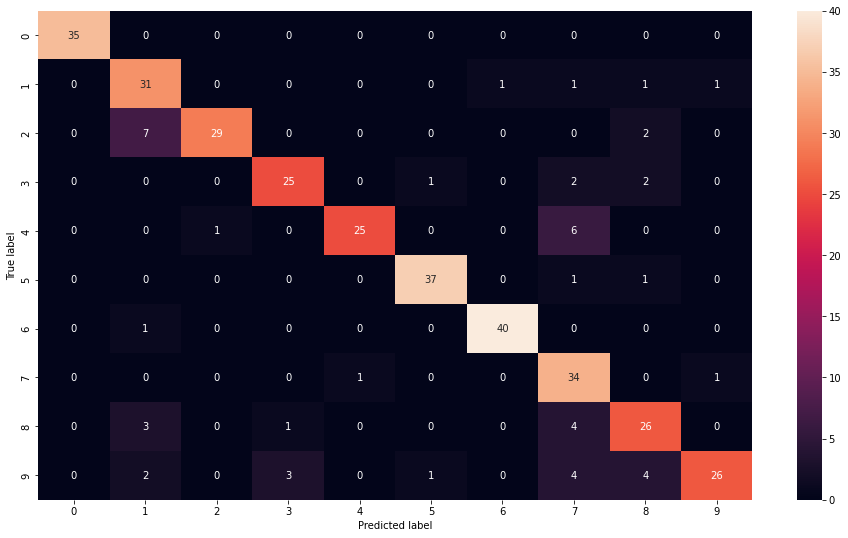

In [16]:
bayes = GaussianNB()
bayes.fit(X_train,y_train)
y_pred = bayes.predict(X_test)
accBayes=bayes.score(X_train,y_train)
conf_matrix=confusion_matrix(y_test, y_pred)
plt.figure(figsize=(16,9))
ax = sns.heatmap(conf_matrix,annot=True)
ax.set(xlabel="Predicted label",
      ylabel="True label")

[0.9895615866388309, 1.0, 0.8608211551844119]


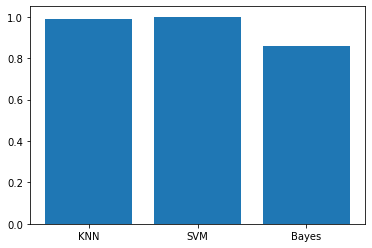

In [17]:
data=[accKNN, accSVM, accBayes]
print(data)
#plt.bar([0,0.5,1], data)
#plt.show()
x = np.arange(3)
fig, ax = plt.subplots()
plt.bar(x, data)
plt.xticks(x, ('KNN', 'SVM', 'Bayes'))
plt.show()

In [ ]:
# we can clearly see that the accuracy of SVM is certain. KNN has the nearest accuracy. Bayes has the least accuracy rate as it assumes that all features are independent which is rarely true. This makes the naive bayes algorithm less accurate than complicated algorithms.

In [19]:
#GapMinder
df = pd.read_csv("gapminder.csv")
df.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059,2.73,0.1,3.328945,24.59620,12314,129.9049,75.3,29.5,Middle East & North Africa
1,19842251,6.43,2.0,1.474353,22.25083,7103,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860,2.24,0.5,4.785170,27.50170,14646,118.8915,75.5,15.4,America
3,2975029,1.40,0.1,1.804106,25.35542,7383,132.8108,72.5,20.0,Europe & Central Asia
4,21370348,1.96,0.1,18.016313,27.56373,41312,117.3755,81.5,5.2,East Asia & Pacific


<AxesSubplot:>

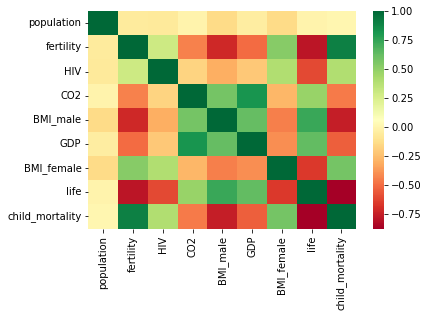

In [20]:
sns.heatmap(df.corr(), cmap="RdYlGn")

0.6192442167740035


C:\Users\synth\AppData\Local\Temp/ipykernel_41544/1725202047.py:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  regression.fit(x[:, None], y)
C:\Users\synth\AppData\Local\Temp/ipykernel_41544/1725202047.py:5: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  print(regression.score(x[:, None], y))
C:\Users\synth\AppData\Local\Temp/ipykernel_41544/1725202047.py:6: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  fig, ax = plt.plot(x,y, 'bo', x, regression.predict(x[:, None]), '-k')


Text(0, 0.5, 'Life Expectancy')

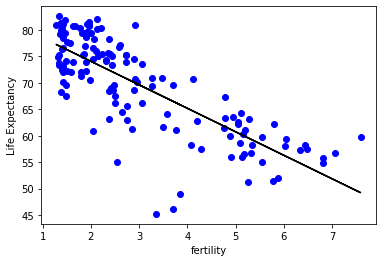

In [21]:
x = df["fertility"]
y = df["life"]
regression = LinearRegression()
regression.fit(x[:, None], y)
print(regression.score(x[:, None], y))
fig, ax = plt.plot(x,y, 'bo', x, regression.predict(x[:, None]), '-k')
plt.xlabel('fertility')
plt.ylabel('Life Expectancy')

In [22]:
#5 cross validation for regression with fertility feature
cross_val_score(regression,x[:,None],y,cv=5)

C:\Users\synth\AppData\Local\Temp/ipykernel_41544/1125183871.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  cross_val_score(regression,x[:,None],y,cv=5)


array([0.71001079, 0.75007717, 0.55271526, 0.547501  , 0.52410561])

0.8974995317332959


ValueError: too many values to unpack (expected 2)

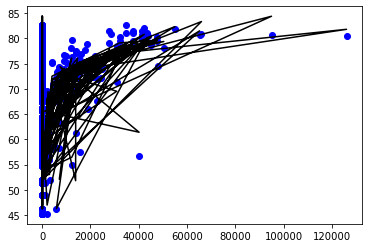

In [23]:
x=df[["fertility", "HIV", "CO2", "BMI_male", "GDP", "BMI_female", "child_mortality"]]
y=df["life"]
regression= LinearRegression()
regression.fit(x,y)
print(regression.score(x,y))
fig, ax= plt.plot(x,y, 'bo', x,regression.predict(x), '-k')

In [24]:
#5 cross validation for regression with all features
cross_val_score(regression,x,y,cv=5)
#We can see that the accuracy of data with more features is high when compared to with one feature. This shows that the features are interdependent.

array([0.81621881, 0.8322471 , 0.90868335, 0.81325568, 0.94404223])

In [25]:
#Creditcard
df = pd.read_csv("creditcard.csv")
print(df.shape)
df.head()

(284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


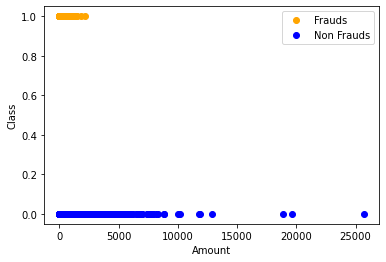

In [27]:
frauds = df.loc[df['Class'] == 1]
non_frauds = df.loc[df['Class'] == 0]
frauds
plt.plot(frauds.Amount, frauds.Class, 'o', color="orange", label="Frauds")
plt.plot(non_frauds.Amount, non_frauds.Class, 'o', color="blue", label='Non Frauds')
plt.xlabel('Amount')
plt.ylabel('Class')
plt.legend()
plt.show()

In [ ]:
#We can see that there are less number of fraud transactions occured. Also the amount of all the fraud transaction is low.

C:\Users\synth\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[[284156    159]
 [   151    341]]


C:\Users\synth\AppData\Local\Temp/ipykernel_41544/2004345880.py:10: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.set(Xlabel="Predicted label",


[Text(0.5, 15.0, 'Predicted label'), Text(33.0, 0.5, 'True label')]

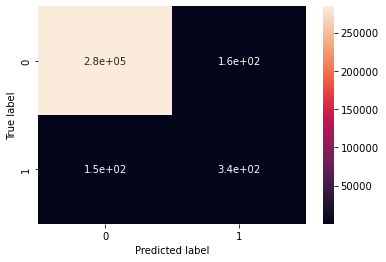

In [28]:
#logistic Regression
X=df.drop("Class", axis=1)
y=df.Class
log_regression = LogisticRegression()
log_regression.fit(X,y)
y_pred = log_regression.predict(X)
conf_matrix = confusion_matrix(y, y_pred)
print(conf_matrix)
ax=sns.heatmap(conf_matrix,annot=True)
ax.set(Xlabel="Predicted label",
      ylabel="True label")